In [2]:
import matplotlib
import  pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [ ]:
common_categories = ['category','agent_type','type','folder']
regexp_total = re.compile(r'analizo_(.)*')

In [21]:
anac_df = pd.read_csv(os.getcwd() +"/data/anac.csv")
anac_df.rename(columns={'type':'category'},inplace=True)
anac_df['type'] = 'anac'
anac_df['category'] = 'anac'
anac_df['agent_type'] = 'agent'
cccc_cols= [c for c in anac_df if 'cccc' in c]
drop_cccc_dic = {k[5:]:k for k in cccc_cols}

In [22]:
rep_df_2d = pd.read_csv('data/2d-03_10_2018.csv')
rep_df_2d = rep_df_2d[rep_df_2d['is_source']==True].copy()
rep_df_2d['category'] = 'robocup-2d'
rep_df_2d['agent_type'] = 'agent'
rep_df_2d.rename(index=str,columns=drop_cccc_dic,inplace=True)

robocup_other =  pd.read_csv(os.getcwd() +"/data/robocup-other-04_10_2018.csv")
robocup_other['category'] = 'Robcup-other-leagues'
robocup_other['agent_type'] = 'Robot'

robo_sim_df = pd.concat([rep_df_2d,robocup_other],sort=False)

In [23]:
robo_sim_df = robo_sim_df.rename(index=str,columns={'new_dir':'folder'})
robo_sim_df.to_csv('data/robo-sim-data.csv')
#robo_sim_df = robo_sim_df[[c for c in robo_sim_df.columns if regexp_total.search(c) or (c in common_categories)]].copy()

In [24]:

robo_sim_df['type'] = 'Robocup'

In [25]:
git_hub_df = pd.read_csv(os.getcwd() +"/data/git-hub-10_10_2018.csv")
git_hub_df['category'] = git_hub_df['new_dir_name'].str.split("/").str[-2]
git_hub_df['type'] = 'git-hub'
agent_categories = ['chess']
git_hub_df = git_hub_df.groupby('category').filter(lambda x: x['analizo_mmloc_sum'].count()>25)

git_hub_df.loc[git_hub_df.category.isin(agent_categories), 'agent_type'] = 'agent'
git_hub_df.loc[~git_hub_df.category.isin(agent_categories), 'agent_type'] = 'non-agent'
git_hub_df.rename(index=str,columns=drop_cccc_dic,inplace=True)

In [26]:
external_df  = pd.read_csv(os.getcwd() +"/data/external-04_10_2018code_analysis__summery_report.csv")
external_df.rename(columns={'type':'category'},inplace=True)
external_df['type'] = 'Industry'
external_df['agent_type'] = 'Robot'

df_all = pd.concat([git_hub_df,anac_df,external_df],sort=False)
#df_all = df_all[[c for c in df_all.columns if  regexp_total.search(c) or c in common_categories]].copy()
df_all[4:5].columns[df_all[4:5].isna().any()].tolist()
cols = [
 'analizo__module',
 'analizo_lcom4',
 'analizo_npm',
 'analizo_dit',
 'analizo_acc',
 'analizo_cbo',
 'analizo_accm',
 'analizo_amloc',
 'analizo_sc',
 'analizo_noc',
 'analizo_rfc',
 'analizo_noa',
 'analizo_nom',
 'analizo_npa',
 'analizo_mmloc',
 'analizo_loc',
 'analizo_anpm',
 'analizo_total_eloc']

In [27]:
df_all.drop(columns=cols,inplace=True)
#df_all.dropna(inplace=True)
df_all.shape

(640, 240)

In [28]:
df_robo_all = pd.concat([robo_sim_df,df_all],sort=False,ignore_index=True)
df_robo_all.shape

(729, 274)

In [29]:
df_robo_all['category'] = df_robo_all['category'].str.title()

In [30]:
print "project before removing lower quantile : " + str(df_robo_all.shape[0])
df_robo_all =df_robo_all.loc[df_robo_all['analizo_total_loc']>1000,:]
print "project after removing lower quantile : " + str(df_robo_all.shape[0])

project before removing lower quantile : 729
project after removing lower quantile : 542


In [31]:
df_robo_all.to_csv("data/data.csv")

In [32]:
df_robo_all.groupby(['type','category'])['analizo_accm_mean'].count()

type      category            
Industry  Autodrivers              1
          Robo-Projects            4
Robocup   Robcup-Other-Leagues    21
          Robocup-2D              64
anac      Anac                    25
git-hub   Audio                   53
          Chess                   29
          Education               50
          Finance                 26
          Games                   34
          Graphics                59
          Ide                     53
          Mobile                  41
          Robot-Simulation        23
          Security                59
Name: analizo_accm_mean, dtype: int64

In [33]:
# df_robo_all.groupby('category').sum()['analizo_total_modules'].plot(kind='bar')

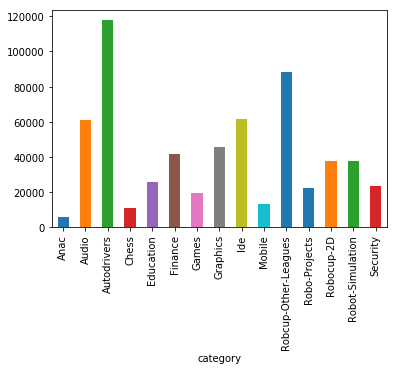

In [34]:
df_robo_all.groupby('category').mean()['analizo_total_loc'].plot(kind='bar')

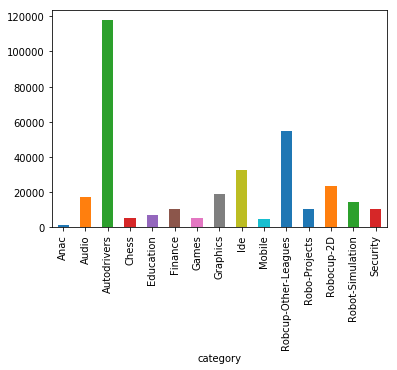

In [35]:
df_robo_all.groupby('category').median()['analizo_total_loc'].plot(kind='bar')

In [36]:
df_robo_all.to_csv("data/data.csv")
list(df_robo_all)

['Current_group_location',
 'Exe_files',
 'cccc_IF4',
 'cccc_IF4_per_module',
 'cccc_IF4_visible',
 'cccc_IF4_visible_per_module',
 'cccc_McCabes_cyclomatic_complexity',
 'cccc_McCabes_cyclomatic_complexity_per_line_of_comment',
 'cccc_McCabes_cyclomatic_complexity_per_module',
 'Number_exe_files',
 'Number_libraries_Total',
 'Number_lines_Total',
 'Number_of_binaries',
 'analizo_acc_kurtosis',
 'analizo_acc_mean',
 'analizo_acc_mode',
 'analizo_acc_quantile_lower',
 'analizo_acc_quantile_max',
 'analizo_acc_quantile_median',
 'analizo_acc_quantile_min',
 'analizo_acc_quantile_ninety_five',
 'analizo_acc_quantile_upper',
 'analizo_acc_skewness',
 'analizo_acc_standard_deviation',
 'analizo_acc_sum',
 'analizo_acc_variance',
 'analizo_accm_kurtosis',
 'analizo_accm_mean',
 'analizo_accm_mode',
 'analizo_accm_quantile_lower',
 'analizo_accm_quantile_max',
 'analizo_accm_quantile_median',
 'analizo_accm_quantile_min',
 'analizo_accm_quantile_ninety_five',
 'analizo_accm_quantile_upper',
 

In [37]:
df_robo_all.groupby('category').sum()['analizo_total_modules']

category
Anac                      443.0
Audio                   15263.0
Autodrivers               940.0
Chess                    2260.0
Education               14039.0
Finance                 10400.0
Games                    6763.0
Graphics                23328.0
Ide                     30718.0
Mobile                   7239.0
Robcup-Other-Leagues    14763.0
Robo-Projects            1269.0
Robocup-2D              13315.0
Robot-Simulation         7820.0
Security                20702.0
Name: analizo_total_modules, dtype: float64